<a href="https://colab.research.google.com/github/Arya-Hari/fabric-classification-cnn/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import my_utils

In [6]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re

print(tf.__version__)
import pathlib

path = "/content/drive/MyDrive/Fabrics_simple"
data_dir = pathlib.Path(path)

2.15.0


In [7]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 1008 files belonging to 2 classes.
Using 807 files for training.
Found 1008 files belonging to 2 classes.
Using 201 files for validation.
['Denim', 'Wool']


0

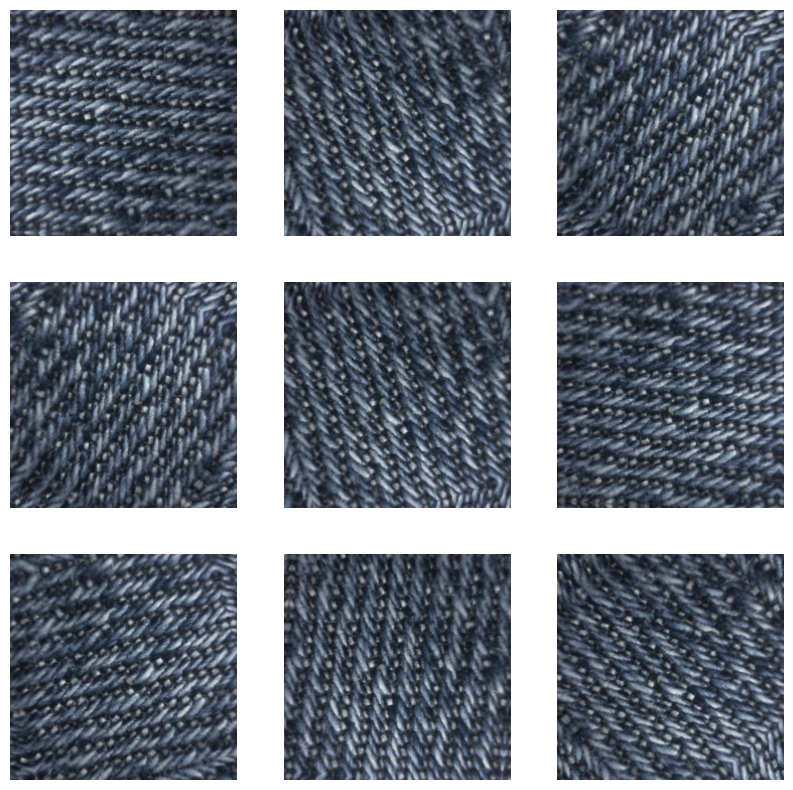

In [8]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        #tf.keras.layers.RandomFlip("horizontal"),
        #tf.keras.layers.RandomFlip("vertical"),
        tf.keras.layers.RandomRotation(0.5)
    ]
)

#visualize the effect of the augmentations on a sample image
my_utils.display_augmentation(train_ds, data_augmentation)

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 2

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/fabric_classification/", "Model-1-Aug-fs")

hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint])

model.summary()

Epoch 1/50
26/26 [==============================] - ETA: 0s - loss: 15.9119 - accuracy: 0.5663
Epoch 1: val_accuracy improved from -inf to 0.30846, saving model to /content/drive/MyDrive/fabric_classification/Model-1-Aug-fs.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 279s 11s/step - loss: 15.9119 - accuracy: 0.5663 - val_loss: 1.3286 - val_accuracy: 0.3085
Epoch 2/50
26/26 [==============================] - ETA: 0s - loss: 0.9898 - accuracy: 0.6022
Epoch 2: val_accuracy improved from 0.30846 to 0.62189, saving model to /content/drive/MyDrive/fabric_classification/Model-1-Aug-fs.h5
26/26 [==============================] - 244s 10s/step - loss: 0.9898 - accuracy: 0.6022 - val_loss: 0.6978 - val_accuracy: 0.6219
Epoch 3/50
26/26 [==============================] - ETA: 0s - loss: 0.9257 - accuracy: 0.6208
Epoch 3: val_accuracy improved from 0.62189 to 0.78607, saving model to /content/drive/MyDrive/fabric_classification/Model-1-Aug-fs.h5
26/26 [==============================] - 251s 10s/step - loss: 0.9257 - accuracy: 0.6208 - val_loss: 0.5103 - val_accuracy: 0.7861
Epoch 4/50
26/26 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.6530
Epoch 4: val_accuracy did not improve from 0.78607
26/

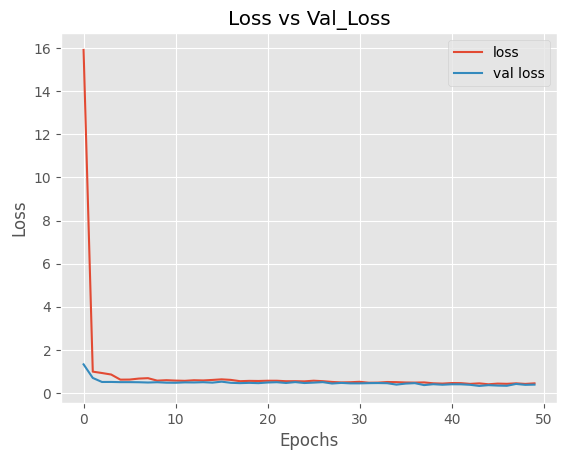

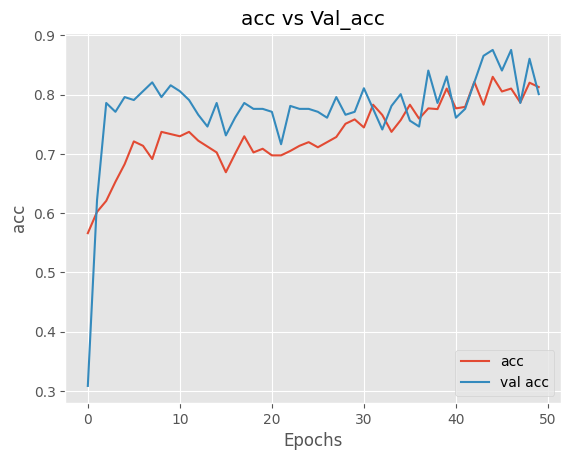

0

In [12]:
my_utils.generate_plot(hist)

In [16]:
sunflower_path = "/content/drive/MyDrive/im_2.png"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 262ms/step
This image most likely belongs to Denim with a 96.54 percent confidence.


In [18]:
sunflower_path = "/content/drive/MyDrive/im_3.png"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 237ms/step
This image most likely belongs to Denim with a 86.93 percent confidence.
